In [28]:
%autosave 10
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [42]:
cleaned_data=pd.read_csv("https://raw.githubusercontent.com/jsneha1710/Data-Science-Intern-2-Mini-Project-Task/master/Task%201%20Data%20set/cleaned_data.csv")
X=cleaned_data['LIMIT_BAL']
y=cleaned_data['default payment next month']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)



_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [43]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [44]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba

array([0.07089807, 0.10919345, 0.41616189, ..., 0.26587595, 0.2164479 ,
       0.30735407])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [66]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba)
auc1


0.6211013905082857

_________________________________________________________________________
**Now, plot the ROC curve.**


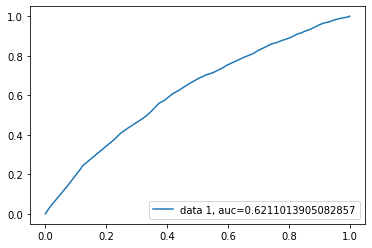

In [46]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[6253    0]
 [1747    0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6253
           1       0.00      0.00      0.00      1747

    accuracy                           0.78      8000
   macro avg       0.39      0.50      0.44      8000
weighted avg       0.61      0.78      0.69      8000



C:\Users\Sneha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


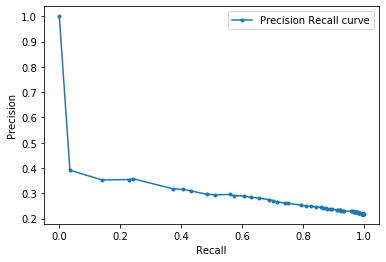

In [48]:
from sklearn.metrics import precision_recall_curve
c_precision, c_recall, _ = precision_recall_curve(y_test,y_pred_proba)
plt.plot(c_recall, c_precision, marker='.', label='Precision Recall curve')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [74]:
from sklearn.metrics import auc
area=auc(c_recall,c_precision)
area

0.3134857575047694

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [65]:
from sklearn import metrics
y_pred_proba1 = logreg.predict_proba(X_train)[::,1]
auc2 = metrics.roc_auc_score(y_train, y_pred_proba1)
auc2


0.6176720955101409

    How is this different, conceptually and quantitatively, from your earlier calculation?
